In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
e_charge = 1.6e-19

## 2. Van der Pauw measurement

In [4]:
vdP_data = pd.read_csv(f"data/Caro_Carlo_vdPauw.txt", delimiter = "\t", skiprows = 4, skipinitialspace = True)
vdP_data

,# I_res(A),I_hall(A),B(mT),temp(K),Vr1234(V),Vr2134(V),Vr2341(V),Vr3241(V),Vr3412(V),Vr4312(V),Vr4123(V),Vr1423(V),Vh1342+(V),Vh3142+(V),Vh2413+(V),Vh4213+(V),Vh1342-(V),Vh3142-(V),Vh2413-(V),Vh4213-(V)
0,0.002,0.002,200,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.088215,-0.100658,-0.073427,0.081455,0.068840,-0.081760,-0.093200,0.099623
1,0.002,0.002,400,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.098297,-0.110628,-0.063018,0.071872,0.058322,-0.071103,-0.104175,0.109538
2,0.002,0.002,600,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.108439,-0.120678,-0.052603,0.062328,0.048213,-0.060891,-0.114615,0.119487


In [5]:
vdP_data.keys(), vdP_data["Vr1234(V) "][0]

(Index(['# I_res(A)', 'I_hall(A)', 'B(mT)', 'temp(K)', 'Vr1234(V) ',
        'Vr2134(V) ', 'Vr2341(V) ', 'Vr3241(V) ', 'Vr3412(V) ', 'Vr4312(V) ',
        'Vr4123(V) ', 'Vr1423(V) ', 'Vh1342+(V) ', 'Vh3142+(V) ', 'Vh2413+(V) ',
        'Vh4213+(V) ', 'Vh1342-(V) ', 'Vh3142-(V) ', 'Vh2413-(V) ',
        'Vh4213-(V) '],
       dtype='object'),
 -0.32206)

In [6]:
# 1.a van der Pauw measurements

# Hall resistivities
I_res = vdP_data["# I_res(A)"][0]
d = 1                                       # sample width ???? (should be irrelevant)

R_1234 = vdP_data["Vr1234(V) "][0] / I_res
R_2134 = vdP_data["Vr2134(V) "][0] / I_res
R_2341 = vdP_data["Vr2341(V) "][0] / I_res
R_3241 = vdP_data["Vr3241(V) "][0] / I_res
R_3412 = vdP_data["Vr3412(V) "][0] / I_res
R_4312 = vdP_data["Vr4312(V) "][0] / I_res
R_4123 = vdP_data["Vr4123(V) "][0] / I_res
R_1423 = vdP_data["Vr1423(V) "][0] / I_res

Q_A = (R_2134-R_1234) / (R_3241-R_2341)
Q_B = (R_4312-R_3412) / (R_1423-R_4123)

A_A = ( (Q_A-1) / (Q_A+1) )**2
A_B = ( (Q_B-1) / (Q_B+1) )**2

f_A = 1 - 0.34657*A_A - 0.09236*A_A**2
f_B = 1 - 0.34657*A_B - 0.09236*A_B**2

# inverse conductivity
rho = np.pi*d / 8 / np.log(2) * ( (R_2134-R_1234+R_3241-R_2341)*f_A + (R_4312-R_3412+R_1423-R_4123)*f_B )


# Hall factors
I_hall = vdP_data["I_hall(A)"][0]
B_200 = vdP_data["B(mT)"][0] / 1000
B_400 = vdP_data["B(mT)"][1] / 1000
B_600 = vdP_data["B(mT)"][2] / 1000

R_H_200 = 1 / 8 * d / B_200 * ( (vdP_data["Vh3142+(V) "][0]-vdP_data["Vh1342+(V) "][0]+vdP_data["Vh1342-(V) "][0]-vdP_data["Vh3142-(V) "][0]) + (vdP_data["Vh4213+(V) "][0]-vdP_data["Vh2413+(V) "][0]+vdP_data["Vh2413-(V) "][0]-vdP_data["Vh4213-(V) "][0]) ) / I_hall
R_H_400 = 1 / 8 * d / B_400 * ( (vdP_data["Vh3142+(V) "][1]-vdP_data["Vh1342+(V) "][1]+vdP_data["Vh1342-(V) "][1]-vdP_data["Vh3142-(V) "][1]) + (vdP_data["Vh4213+(V) "][1]-vdP_data["Vh2413+(V) "][1]+vdP_data["Vh2413-(V) "][1]-vdP_data["Vh4213-(V) "][1]) ) / I_hall
R_H_600 = 1 / 8 * d / B_600 * ( (vdP_data["Vh3142+(V) "][2]-vdP_data["Vh1342+(V) "][2]+vdP_data["Vh1342-(V) "][2]-vdP_data["Vh3142-(V) "][2]) + (vdP_data["Vh4213+(V) "][2]-vdP_data["Vh2413+(V) "][2]+vdP_data["Vh2413-(V) "][2]-vdP_data["Vh4213-(V) "][2]) ) / I_hall

R_H_200, R_H_400, R_H_600

R_avg = (R_H_200 + R_H_400 + R_H_600) / 3

# carrier concentration n
n_vdP_200 = 1 / e_charge / R_H_200
n_vdP_400 = 1 / e_charge / R_H_400
n_vdP_600 = 1 / e_charge / R_H_600
n_avg = (n_vdP_200 + n_vdP_400 + n_vdP_600) / 3

# mobility mu
mu_vdP_200 = abs(R_H_200) / rho
mu_vdP_400 = abs(R_H_400) / rho
mu_vdP_600 = abs(R_H_600) / rho
mu_avg = (mu_vdP_200 + mu_vdP_400 + mu_vdP_600) / 3


f_A, f_B, rho, R_H_200, R_H_400, R_H_600
n_vdP_200, n_vdP_400, n_vdP_600, mu_vdP_200, mu_vdP_400, mu_vdP_600, n_avg, mu_avg

(-2.6241897814049914e+17,
 -2.526480675580933e+17,
 -2.5085289985952243e+17,
 0.03756614438348879,
 0.039018977335050616,
 0.03929820714575792,
 -2.5530664851937162e+17,
 0.03862777628809911)

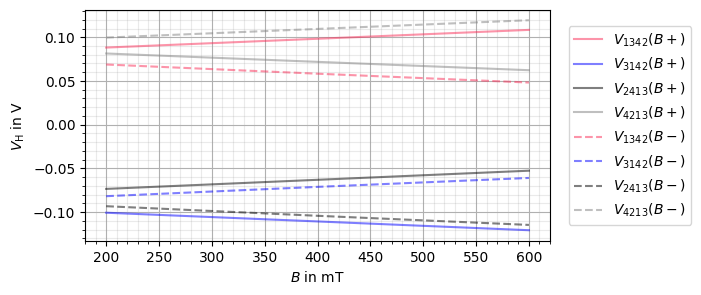

In [7]:
# 1.b - B-field dependence of Hall voltages

# R_1_plus = 1 / 2 * ()


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'$B$ in mT')      # \mathrm{\AA} wird im notebook angezeigt aber nicht im pgf plot!! dazu durch \si{\AA} in der .pgf ersetzen!!
ax.set_ylabel(r'$V_\mathrm{H}$ in V')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(vdP_data["B(mT)"], vdP_data["Vh1342+(V) "], color = "xkcd:red pink", alpha = 0.5, label = r"$V_\mathrm{1342}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh3142+(V) "], color = "blue", alpha = 0.5, label = r"$V_\mathrm{3142}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh2413+(V) "], color = "black", alpha = 0.5, label = r"$V_\mathrm{2413}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh4213+(V) "], color = "grey", alpha = 0.5, label = r"$V_\mathrm{4213}(B+)$")

ax.plot(vdP_data["B(mT)"], vdP_data["Vh1342-(V) "], color = "xkcd:red pink", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{1342}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh3142-(V) "], color = "blue", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{3142}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh2413-(V) "], color = "black", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{2413}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh4213-(V) "], color = "grey", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{4213}(B-)$")

ax.legend()
# ax.legend(loc="center left")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


plt.savefig('FM.QHE_visualizations/V_H_over_B.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/V_H_over_B.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

## 2. Classical Hall-Effect

In [8]:
# a. Hall resistivity
d_cHall = 1

vdP_data = pd.read_csv(f"data/Caro_Carlo_vdPauw.txt", delimiter = "\t", skiprows = 4, skipinitialspace = True)

In [18]:
# Curve-Fit
def lin_reg(x, m):
    return m * x


# a. longitudinal resistivity
def calculate_rho_xx(T):
    # ratio of V and I (the slope of V over I) is the resistivity in xx (longitudinal)
    R_xx_data = pd.read_csv(f"data/R-{T}.dat", delimiter = "\t", skiprows = 3, skipinitialspace = True)
    popt_, pcov_ = curve_fit(lin_reg, R_xx_data["# Current[mA]"]/1000, R_xx_data["Uxx[mV]"]/1000)
    residuals = -R_xx_data["# Current[mA]"]/1000*popt_+ R_xx_data["Uxx[mV]"]/ 1000
    # returns longitudinal resistivity + residuals
    return popt_, residuals


# a. Hall resistivity
def calculate_rho_xy(T):
    # ratio of R_xy and B (slope of R_xy over B) is resistivity in xy (Hall)
    R_xy_data = pd.read_csv(f"data/H-{T}.dat", delimiter = "\t", skiprows = 4, skipinitialspace = True)
    popt_, pcov_ = curve_fit(lin_reg, R_xy_data["# B-Field[mT]"]/1000, R_xy_data["Rxy[ohm]"])
    residuals = -R_xy_data["# B-Field[mT]"]/1000*popt_ + R_xy_data["Rxy[ohm]"]
    # returns Hall resistivity + residuals
    return popt_, residuals

R_xx = calculate_rho_xx("294")
R_xy = calculate_rho_xy("294")

R_xx, R_xy



((array([443.213048]),
  0    0.002189
  1    0.001695
  2    0.001237
  3    0.002351
  4    0.001861
  dtype: float64),
 (array([-708.05980449]),
  0    8.783655
  1    3.983090
  2   -1.115920
  3   -4.240997
  4   -5.459792
  5   -5.938069
  6   -5.655231
  dtype: float64))

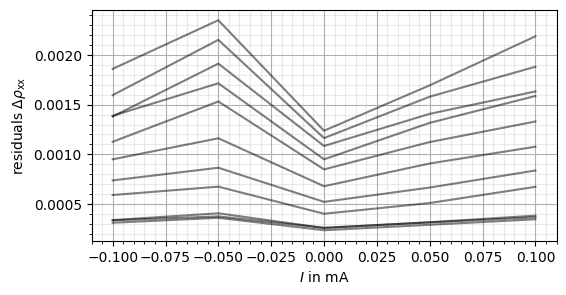

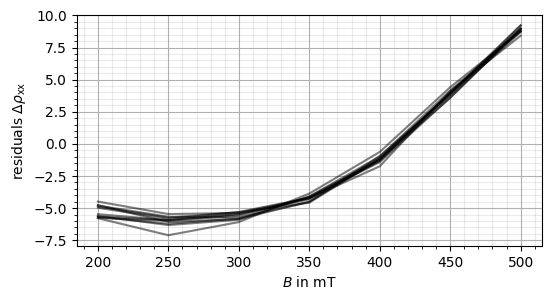

In [19]:
# a. residual analysis
T_H_list = ["006", "020", "051", "081", "110", "140", "180", "210", "240", "270", "294"]
T_R_list = ["007", "020", "051", "081", "110", "140", "181", "211", "241", "270", "294"]


I_xx = pd.read_csv(f"data/R-294.dat", delimiter = "\t", skiprows = 3, skipinitialspace = True)["# Current[mA]"]
B_xy = pd.read_csv(f"data/H-294.dat", delimiter = "\t", skiprows = 4, skipinitialspace = True)["# B-Field[mT]"]

residues_xx_list = []
residues_xy_list = []

for i, T in enumerate(T_H_list):
    residues_xx = calculate_rho_xx(T_R_list[i])[1]
    residues_xy = calculate_rho_xy(T)[1]

    residues_xx_list.append(residues_xx)
    residues_xy_list.append(residues_xy)


# longitudinal resistivity residuals
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'$I$ in mA') 
ax.set_ylabel(r'residuals $\Delta\rho_\mathrm{xx}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

for residues in residues_xx_list:
    ax.plot(I_xx, residues, color = "black", alpha = 0.5, label = r"$n$")


plt.savefig('FM.QHE_visualizations/rho_xx_residue_analysis.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/rho_xx_residue_analysis.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()


# Hall resistivity residuals
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'$B$ in mT')
ax.set_ylabel(r'residuals $\Delta\rho_\mathrm{xx}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

for residues in residues_xy_list:
    # print(residues)
    ax.plot(B_xy, residues, color = "black", alpha = 0.5, label = r"$n$")


plt.savefig('FM.QHE_visualizations/rho_xy_residue_analysis.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/rho_xy_residue_analysis.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

[-9.35242428e+15  5.68500590e-22]


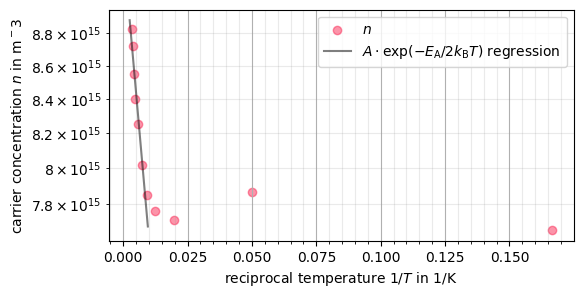

In [97]:
# b. carrier concentration n over T
T_H_list = ["006", "020", "051", "081", "110", "140", "180", "210", "240", "270", "294"]
T_R_list = ["007", "020", "051", "081", "110", "140", "181", "211", "241", "270", "294"]


# Curve-Fit
k_Boltzmann = 1.38e-23
def activation_exp_reg(t, A, E_A):
    return A * np.exp(-E_A/(2.0*k_Boltzmann*t))


T_plot_list = []
n_plot_list = []
mu_plot_list = []
for i, T in enumerate(T_H_list):
    rho_xy = calculate_rho_xy(T)[0][0]
    rho_xx = calculate_rho_xx(T_R_list[i])[0][0]
    # print(R_H)
    n = 1 / (rho_xy/d_cHall) / e_charge
    mu = abs(rho_xy) / rho_xx
    T_plot_list.append(int(T))
    n_plot_list.append(n)
    mu_plot_list.append(mu)


# print(T_plot_list, n_plot_list)
exp_popt_, exp_pcov_ = curve_fit(activation_exp_reg, T_plot_list[4:], n_plot_list[4:], p0 = [8e10, 10e-30])
print(exp_popt_)

T_plot_array = np.linspace(T_plot_list[4]*0.95, T_plot_list[-1]*1.35, 1000)
n_plot_array = np.array([activation_exp_reg(T, *exp_popt_) for T in T_plot_array])


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'reciprocal temperature $1/T$ in 1/K')
ax.set_ylabel(r'carrier concentration $n$ in m$^-3$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.scatter([1/T for T in T_plot_list], [abs(n) for n in n_plot_list], color = "xkcd:red pink", alpha = 0.5, label = r"$n$")
ax.plot([1/T for T in T_plot_array], [abs(n) for n in n_plot_array], color = "black", alpha = 0.5, label = r"$A\cdot\mathrm{exp}(-E_\mathrm{A}/2k_\mathrm{B}T)$ regression")
ax.set_yscale("log")
# ax.plot(T_plot_list, n_plot_list, color = "xkcd:red pink", alpha = 0.5, label = r"$n$")

ax.legend()
ax.legend(loc="upper right")


plt.savefig('FM.QHE_visualizations/n_over_T.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/n_over_T.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

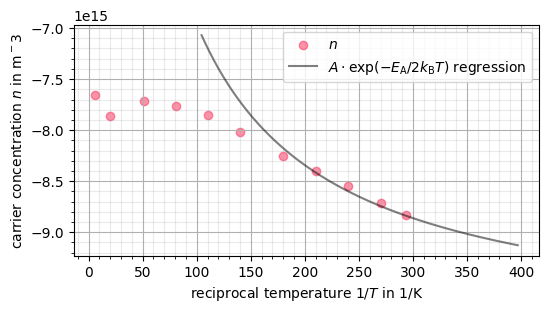

In [115]:
# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'reciprocal temperature $1/T$ in 1/K')
ax.set_ylabel(r'carrier concentration $n$ in m$^-3$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

T_plot_array = np.linspace(T_plot_list[4]*0.95, T_plot_list[-1]*1.35, 1000)
n_plot_array = np.array([activation_exp_reg(T, -10e15, 10e-22) for T in T_plot_array])

ax.scatter(T_plot_list, n_plot_list, color = "xkcd:red pink", alpha = 0.5, label = r"$n$")
ax.plot(T_plot_array, n_plot_array, color = "black", alpha = 0.5, label = r"$A\cdot\mathrm{exp}(-E_\mathrm{A}/2k_\mathrm{B}T)$ regression")
# ax.set_yscale("log")
# ax.plot(T_plot_list, n_plot_list, color = "xkcd:red pink", alpha = 0.5, label = r"$n$")

ax.legend()
ax.legend(loc="upper right")

plt.show()

In [72]:
activation_exp_reg(5, 1, 1)

1 * np.exp(-1/(2*k_Boltzmann*10e27)), activation_exp_reg(200, 1.0, 10e-28)

(0.9999963768181579, 0.9999998188405961)

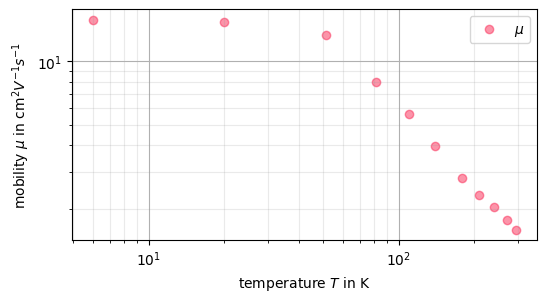

In [ ]:
# b. mobility mu over T


def temp_exp_reg(t, a, b, c):
    return a*t**b +c

temp_exp_popt_, temp_exp_pcov = curve_fit(temp_exp_reg, T_plot_list[2:], mu_plot_list[2:])


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'temperature $T$ in K')
ax.set_ylabel(r'mobility $\mu$ in cm$^2V^{-1}s^{-1}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

# ax.semilogy([1/T for T in T_plot_list], [abs(n) for n in n_plot_list], color = "xkcd:red pink", alpha = 0.5, label = r"$n$")
ax.scatter(T_plot_list, mu_plot_list, color = "xkcd:red pink", alpha = 0.5, label = r"$\mu$")
ax.plot([1/T for T in T_plot_array], [abs(n) for n in n_plot_array], color = "black", alpha = 0.5, label = r"$A\cdot\mathrm{exp}(-E_\mathrm{A}/2k_\mathrm{B}T)$ regression")
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.legend(loc="upper right")


plt.savefig('FM.QHE_visualizations/mu_over_T.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/mu_over_T.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

## 3. Quantum Hall-Effect

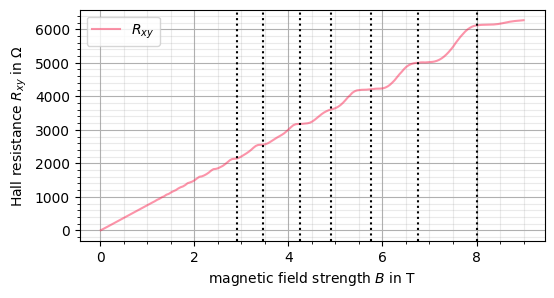

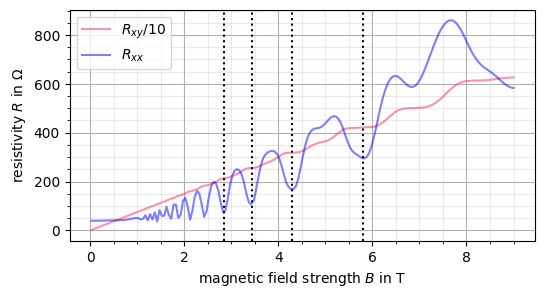

In [13]:
QH_xy_data = pd.read_csv(f"data/QHE/2729-qhe.txt", delimiter = "\t", skiprows = 2, skipinitialspace = True)
QH_xx_data = pd.read_csv(f"data/QHE/2729-sdh.txt", delimiter = "\t", skiprows = 2, skipinitialspace = True)

B_xy = QH_xy_data["Oe"] / 10000
R_xy = QH_xy_data["Ohms"]

B_xx = QH_xx_data["Oe"] / 10000
R_xx = QH_xx_data["Ohm"]


popt_xy_, pcov_ = curve_fit(lin_reg, B_xy, R_xy)
popt_xx_, pcov_ = curve_fit(lin_reg, B_xx, R_xx)

QH_rho_xy = popt_xy_ * d_cHall
QH_rho_xx = popt_xx_ * d_cHall


# a. Hall resistance over B

# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'magnetic field strength $B$ in T')
ax.set_ylabel(r'Hall resistance $R_{xy}$ in $\Omega$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(B_xy, R_xy, color = "xkcd:red pink", alpha = 0.5, label = r"$R_{xy}$")
# ax.plot(B_xx, R_xx, color = "xkcd:red pink", alpha = 0.5, label = r"$R_{xx}$")

# plateaus by eye test
B_xy_plateau_list = [2.9, 3.45, 4.25, 4.9, 5.75, 6.75, 8]
for B_xyi in B_xy_plateau_list:
    ax.axvline(x = B_xyi, linestyle = "dotted", color = "black")

ax.legend()
ax.legend(loc="upper left")

plt.savefig('FM.QHE_visualizations/QHE_R_xy_over_B.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/QHE_R_xy_over_B.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()


# b. longitudinal resistance over B

# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'magnetic field strength $B$ in T')
ax.set_ylabel(r'resistivity $R$ in $\Omega$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(B_xy, R_xy / 10, color = "xkcd:red pink", alpha = 0.5, label = r"$R_{xy} / 10$")
ax.plot(B_xx, R_xx, color = "blue", alpha = 0.5, label = r"$R_{xx}$")

B_xy_plateau_list = [2.85, 3.45, 4.28, 5.8]
for B_xyi in B_xy_plateau_list:
    ax.axvline(x = B_xyi, linestyle = "dotted", color = "black")

ax.legend()
ax.legend(loc="upper left")

plt.savefig('FM.QHE_visualizations/QHE_R_xx_over_B.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/QHE_R_xx_over_B.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

In [14]:
h_planck = 6.626e-34

unit = h_planck/e_charge**2

rez_nu = 2146 / unit
nu = 1 / rez_nu

rez_nu, nu

(0.08291216420162995, 12.060956430568499)

In [15]:
# n_e determination
2.85, 3.45, 4.28, 5.8

rez_dB1 = 1/5.8-1/4.28
rez_dB2 = 1/4.28-1/3.45
rez_dB3 = 1/3.45-1/2.85
 
rez_dB_avg = (rez_dB1+rez_dB2+rez_dB3) / 3
rez_dB_avg

-0.059487799959669276

In [17]:
2*e_charge/h_planck/0.0594/(10**15)

8.130403542416824